<a href="https://colab.research.google.com/github/SantoshJambagi2004/Bio_Inspired_Systems/blob/main/BIS_Lab_Algorithm_and_application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 1/10, Alpha Score: 5.364993573456532
Iteration 2/10, Alpha Score: 0.6234608732229422
Iteration 3/10, Alpha Score: 0.28762362740358455
Iteration 4/10, Alpha Score: 0.12241546656122748
Iteration 5/10, Alpha Score: 0.013224357512213982
Iteration 6/10, Alpha Score: 0.01258426105377685
Iteration 7/10, Alpha Score: 0.0016114620418403172
Iteration 8/10, Alpha Score: 0.0016114620418403172
Iteration 9/10, Alpha Score: 0.0015946145119175208
Iteration 10/10, Alpha Score: 0.0015100538526478622
Best Solution: [ 0.03615717 -0.01423773]
Best Solution Fitness: 0.0015100538526478622


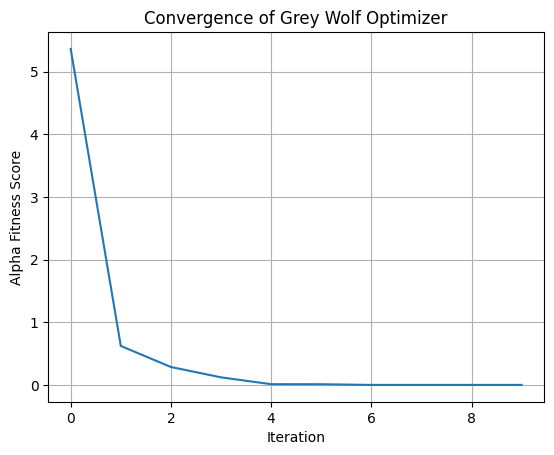

In [2]:
#algorithm
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the Problem (a mathematical function to optimize)
def objective_function(x):
    return np.sum(x**2)  # Example: Sphere function (minimize sum of squares)

# Step 2: Initialize Parameters
num_wolves = 5  # Number of wolves in the pack
num_dimensions = 2  # Number of dimensions (for the optimization problem)
num_iterations = 10  # Number of iterations
lb = -10  # Lower bound of search space
ub = 10  # Upper bound of search space

# Step 3: Initialize Population (Generate initial positions randomly)
wolves = np.random.uniform(lb, ub, (num_wolves, num_dimensions))

# Initialize alpha, beta, delta wolves
alpha_pos = np.zeros(num_dimensions)
beta_pos = np.zeros(num_dimensions)
delta_pos = np.zeros(num_dimensions)

alpha_score = float('inf')  # Best (alpha) score
beta_score = float('inf')   # Second best (beta) score
delta_score = float('inf')  # Third best (delta) score

# To store the alpha score over iterations for graphing
alpha_score_history = []

# Step 4: Evaluate Fitness and assign Alpha, Beta, Delta wolves
def evaluate_fitness():
    global alpha_pos, beta_pos, delta_pos, alpha_score, beta_score, delta_score

    for wolf in wolves:
        fitness = objective_function(wolf)

        # Update Alpha, Beta, Delta wolves based on fitness
        if fitness < alpha_score:
            delta_score = beta_score
            delta_pos = beta_pos.copy()

            beta_score = alpha_score
            beta_pos = alpha_pos.copy()

            alpha_score = fitness
            alpha_pos = wolf.copy()
        elif fitness < beta_score:
            delta_score = beta_score
            delta_pos = beta_pos.copy()

            beta_score = fitness
            beta_pos = wolf.copy()
        elif fitness < delta_score:
            delta_score = fitness
            delta_pos = wolf.copy()

# Step 5: Update Positions
def update_positions(iteration):
    a = 2 - iteration * (2 / num_iterations)  # a decreases linearly from 2 to 0

    for i in range(num_wolves):
        for j in range(num_dimensions):
            r1 = np.random.random()
            r2 = np.random.random()

            # Position update based on alpha
            A1 = 2 * a * r1 - a
            C1 = 2 * r2
            D_alpha = abs(C1 * alpha_pos[j] - wolves[i, j])
            X1 = alpha_pos[j] - A1 * D_alpha

            # Position update based on beta
            r1 = np.random.random()
            r2 = np.random.random()
            A2 = 2 * a * r1 - a
            C2 = 2 * r2
            D_beta = abs(C2 * beta_pos[j] - wolves[i, j])
            X2 = beta_pos[j] - A2 * D_beta

            # Position update based on delta
            r1 = np.random.random()
            r2 = np.random.random()
            A3 = 2 * a * r1 - a
            C3 = 2 * r2
            D_delta = abs(C3 * delta_pos[j] - wolves[i, j])
            X3 = delta_pos[j] - A3 * D_delta

            # Update wolf position
            wolves[i, j] = (X1 + X2 + X3) / 3

            # Apply boundary constraints
            wolves[i, j] = np.clip(wolves[i, j], lb, ub)

# Step 6: Iterate (repeat evaluation and position updating)
for iteration in range(num_iterations):
    evaluate_fitness()  # Evaluate fitness of each wolf
    update_positions(iteration)  # Update positions based on alpha, beta, delta

    # Record the alpha score for this iteration
    alpha_score_history.append(alpha_score)

    # Optional: Print current best score
    print(f"Iteration {iteration+1}/{num_iterations}, Alpha Score: {alpha_score}")

# Step 7: Output the Best Solution
print("Best Solution:", alpha_pos)
print("Best Solution Fitness:", alpha_score)

# Plotting the convergence graph
plt.plot(alpha_score_history)
plt.title('Convergence of Grey Wolf Optimizer')
plt.xlabel('Iteration')
plt.ylabel('Alpha Fitness Score')
plt.grid(True)
plt.show()

In [21]:
import random
import math

# Constants
AREA_X = 100  # Area dimensions (100x100)
AREA_Y = 100
NUM_NODES = 50
TRANSMISSION_POWER = 0.1  # Energy per transmission
RECEPTION_POWER = 0.05  # Energy per reception
BASE_STATION_POSITION = (10, 10)  # Base station in the center

class SensorNode:
    def __init__(self, x, y, energy=100):
        self.x = x
        self.y = y
        self.energy = energy
        self.id = random.randint(1, 10000)
        self.parent = None

    def distance_to(self, other_node):
        """Calculate Euclidean distance between two nodes."""
        return math.sqrt((self.x - other_node.x)**2 + (self.y - other_node.y)**2)

    def consume_energy(self, distance, is_transmitting=True):
        """Energy consumption model (transmitting or receiving)."""
        energy = TRANSMISSION_POWER * distance if is_transmitting else RECEPTION_POWER * distance
        self.energy -= energy
        return energy

class Network:
    def __init__(self, num_nodes, area_x, area_y):
        self.nodes = self.generate_nodes(num_nodes, area_x, area_y)
        self.base_station = SensorNode(BASE_STATION_POSITION[0], BASE_STATION_POSITION[1])

    def generate_nodes(self, num_nodes, area_x, area_y):
        """Generate random nodes in the specified area."""
        nodes = []
        for _ in range(num_nodes):
            x = random.randint(0, area_x)
            y = random.randint(0, area_y)
            nodes.append(SensorNode(x, y))
        return nodes

    def find_closest_node(self, node, target):
        """Find the closest node to the target."""
        closest_node = None
        min_dist = float('inf')
        for n in self.nodes:
            dist = node.distance_to(n)
            if dist < min_dist:
                closest_node = n
                min_dist = dist
        return closest_node

    def route_data(self):
        """Route data from nodes to the base station using multi-hop."""
        for node in self.nodes:
            # Find the closest node to the base station (multi-hop)
            closest_node = self.find_closest_node(node, self.base_station)

            # Ensure there is enough energy for the transmission
            if node.energy > 0 and closest_node:
                distance = node.distance_to(closest_node)
                energy_used = node.consume_energy(distance, is_transmitting=True)
                print(f"Node {node.id} transmitting data to Node {closest_node.id}. Energy used: {energy_used}")

                # Now, closest node forwards to the base station
                distance_to_base = closest_node.distance_to(self.base_station)
                energy_used_base = closest_node.consume_energy(distance_to_base, is_transmitting=True)
                print(f"Node {closest_node.id} forwarding data to base station. Energy used: {energy_used_base}")

    def display_network_status(self):
        """Display the current status of the network."""
        print("Base station position:", BASE_STATION_POSITION)
        for node in self.nodes:
            print(f"Node {node.id} position: ({node.x}, {node.y}), Energy: {node.energy:.2f}")

# Simulation
network = Network(NUM_NODES, AREA_X, AREA_Y)

# Display initial status
network.display_network_status()

# Route data from sensor nodes to base station
network.route_data()

Base station position: (10, 10)
Node 9222 position: (86, 0), Energy: 100.00
Node 2966 position: (73, 53), Energy: 100.00
Node 242 position: (39, 49), Energy: 100.00
Node 7042 position: (70, 87), Energy: 100.00
Node 2757 position: (56, 71), Energy: 100.00
Node 7783 position: (75, 46), Energy: 100.00
Node 4232 position: (73, 96), Energy: 100.00
Node 7908 position: (30, 51), Energy: 100.00
Node 8497 position: (32, 82), Energy: 100.00
Node 1165 position: (100, 0), Energy: 100.00
Node 1017 position: (4, 94), Energy: 100.00
Node 2571 position: (18, 59), Energy: 100.00
Node 2222 position: (28, 68), Energy: 100.00
Node 9579 position: (2, 45), Energy: 100.00
Node 82 position: (77, 27), Energy: 100.00
Node 6874 position: (27, 20), Energy: 100.00
Node 2986 position: (27, 97), Energy: 100.00
Node 6170 position: (12, 32), Energy: 100.00
Node 4611 position: (82, 80), Energy: 100.00
Node 9008 position: (71, 31), Energy: 100.00
Node 1691 position: (52, 43), Energy: 100.00
Node 3738 position: (18, 71),